In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.1.0')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-kannada/language-model')

In [6]:
from inltk.tokenizer import KannadaTokenizer

In [7]:
KannadaTokenizer

inltk.tokenizer.KannadaTokenizer

In [8]:
# class KannadaTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/kannada_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/kannada_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(25000)]

In [10]:
itos[:20]

['<unk>',
 '<s>',
 '</s>',
 '.',
 ',',
 '▁',
 '▁ಮತ್ತು',
 'ದ',
 '▁ಈ',
 'ಗಳು',
 'ಯ',
 'ಗಳ',
 'ಗಳನ್ನು',
 'ರ',
 '▁ಒಂದು',
 'ವನ್ನು',
 '-',
 'ವು',
 'ನ',
 'ರು']

In [11]:
# 25,000 is the vocab size that we chose in sentencepiece
kannada_vocab = Vocab(itos)

In [12]:
tokenizer = Tokenizer(tok_func=KannadaTokenizer, lang='kn')

In [13]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [14]:
data_lm = TextLMDataBunch.from_folder(path=path/'transformer', tokenizer=tokenizer, vocab=kannada_vocab)

In [15]:
data_lm.batch_size

64

In [16]:
data_lm.save()

In [17]:
data_lm.show_batch()

idx,text
0,"▁೧೦ ▁ಹಿರಿಯ ▁ಸದಸ್ಯರನ್ನು ▁ಸಭಾಧ್ಯಕ್ಷ ರು ▁ನೇಮಕ ▁ಮಾಡುತ್ತಾರೆ . ▁ಮೀರಾ ▁ಕುಮಾರ್ ▁ರವರು . ▁ಇವರು ▁ಲೋಕ ▁ಸಭೆಯ ▁ಮೊದಲ ▁ಮಹಿಳಾ ▁ಸಭಾ ದ್ಯ ಕ್ಷ ರು . ▁ಸಾಮಾನ್ಯ ▁ದಿನಗಳಲ್ಲಿ ▁ಲೋಕಸಭೆ ▁ಬೆಳಿಗ್ಗೆ ▁೧೧ ▁ರಿಂದ ▁ಮಧ್ಯಾಹ್ನ ▁ಒಂದರ ವರೆಗೆ , ▁ಮತ್ತೆ ▁ಮಧ್ಯಾಹ್ನ ▁ಎರಡರಿಂದ ▁ಸಂಜೆ ▁ಆರ ರ ▁ವರೆಗೆ ▁ಸೇರುತ್ತದೆ . ▁ಮೊದಲ ▁ಒಂದು ▁ಘಂಟೆ ▁ಪ್ರಶ್ನ ೋತ್ತರ ಗಳಿಗೆ ▁ಮೀಸಲ ಾಗಿ ಡ ಲಾಗಿರುತ್ತದೆ . ▁ಭಾರತ ▁ಸರ್ಕಾರದ ▁ಶಾಸಕಾಂಗ ದ ▁ಇನ್ನೊಂದು ▁ಸಭೆ ▁ರಾಜ್ಯ ಸಭೆ . ▁ಯಾವುದೇ ▁ಮಸೂದೆ ಗೆ ▁ಲೋಕಸಭೆ ▁ಒಪ್ಪಿಗೆ ▁ಇತ್ತ ▁ನಂತರ ▁ಅದು ▁ರಾಜ್ಯ"
1,", ▁ಇತ್ತೀಚಿನ ▁ರಾಜಕೀಯ ▁ಶ್ರ ೋ ತೃ ವರ್ಗ ವೊಂದು ▁"" ಸಾ ಕರ್ ▁ಅಮ್ಮ ಂದಿ ರು "" ▁ಹಾಗೂ ▁"" <unk> na <unk> <unk> <unk> ar ▁ಅಪ್ಪ ಂದಿ ರು "" ಗಳನ್ನು ▁ಒಳಗೊಂಡಿದೆ . "" ▁ಇದಲ್ಲದೇ ▁ದೇಹದ ಾರ್ ಢ ್ಯ , ▁ಆಹಾರ ಸೇ ವ ನಾ ▁ಆಯ್ಕೆ , ▁ಅಡ್ ರಿನ ಲಿನ್ ▁ ಜಂ ಕೀ ಗಳಂತಹ ▁ಮನೋ ಸ್ಫುಟ ತೆಯ ನ್ನಾ ಧರಿಸಿ ದ ▁ಗುಂಪು ವರ್ಗ ೀಕರಣ ವೂ ▁ನಡೆಯುತ್ತದೆ . . . ▁ಶ್ರ ೋ ತೃ ವರ್ಗದ ▁ಜತೆಗೇ ▁ಒಂದು"
2,"▁ಅಂಟು ಗಳನ್ನು ▁ಬಳಸಬಹುದು . ▁ತೊಗಟೆ ಬಟ್ಟೆ ಯನ್ನು ▁ತೊಗಟೆ ಯನ್ನು ▁ಮೃದು ▁ಮತ್ತು ▁ಚಪ್ಪಟೆ ಯ ಾಗುವವರೆಗೆ ▁ಜಜ್ಜಿ ▁ತಯಾರಿಸಲಾಗುತ್ತದೆ . ▁ಬಟ್ಟೆ ಗಳಿಗೆ ▁ಹಲವುವೇಳೆ ▁ಬಣ್ಣ ▁ಹಾಕಲಾಗುತ್ತದೆ , ▁ಮತ್ತು ▁ಬಟ್ಟೆಗಳು ▁ಬಹುತೇಕ ▁ಪ್ರತಿಯೊಂದು ▁ಬಣ್ಣದ ಲ್ಲೂ ▁ದೊರಕುತ್ತವೆ . ▁ಬಣ್ಣ ▁ಹಾಕುವ ▁ಪ್ರಕ್ರಿಯೆಯಲ್ಲಿ ▁ಹಲವುವೇಳೆ ▁ಪ್ರತಿ ▁ಪೌಂಡ್ ▁ಬಟ್ಟೆ ಗೆ ▁ಹಲವು ▁ಡ ಜ಼ ನ್ ▁ಗ್ಯಾಲ ನ್ ▁ನೀರು ▁ಬೇಕಾಗುತ್ತದೆ . ▁ಬಟ್ಟೆ ಗಳಲ್ಲಿ ▁ಬಣ್ಣ ವಿರುವ ▁ವಿನ್ಯಾಸಗಳನ್ನು ▁ಬೇರೆಬೇರೆ ▁ಬಣ್ಣದ ▁ನಾರು ಗಳನ್ನು ▁ಒಟ್ಟಾಗಿ ▁ನೇಯ್ದ ು , ▁ಸಿದ್ಧಪಡಿಸಿದ ▁ಬಟ್ಟೆ ಗೆ ▁ಬಣ್ಣ ವಿರುವ ▁ಹೊಲಿಗೆ ಗಳನ್ನು ▁ಸೇರಿಸಿ ,"
3,"▁ಆಕ್ರಮಣ ವನ್ನು ▁ಪಡೆಯಲು ▁ಪ್ರಯತ್ನಿಸ ಬಹುದು . ▁ಒಂದು ▁ವೇಳೆ ▁ಜೋಡಿ ಯು ▁ಒತ್ತಾಯ ವಾಗಿ ▁ಎತ್ತ ುವ ▁ಅಥವಾ ▁ ಶಟಲ್ ▁ಕಾಕ ನ್ನು ▁ತಿರುಗಿ ▁ಕಳುಹಿಸ ಲು ▁ಆ ▁ಸ್ಥಿತಿಯಲ್ಲಿ ▁ಅವರು ▁ಕಾಪಾಡಿಕೊಳ್ಳ ಲೇಬೇಕು : ▁ಎದುರಾಳಿ ಗಳ ▁ಹೊಡೆತ ಗಳನ್ನು ▁ಎದುರಿಸಲು ▁ಅವರು ▁ಅಂಕಣದ ▁ಪೂರ್ಣ ▁ಅಗಲ ವನ್ನು ▁ಕಾಪಾಡಲು ▁ಆಯ್ದುಕೊಳ್ಳ ಬೇಕಾಗುತ್ತದೆ . ▁ಡಬಲ್ಸ್ ▁ನಲ್ಲಿ , ▁ಗೊಂದಲ ▁ಮತ್ತು ▁ಸಂಘರ್ಷ ಣೆ ಗಳ ▁ಪ್ರಯೋಜನ ▁ಪಡೆಯಲು ▁ಆಟಗಾರರು ▁ಸಾಮಾನ್ಯವಾಗಿ ▁ಇಬ್ಬರು ▁ಆಟಗಾರರ ▁ಮಧ್ಯದ ▁ಮೈದಾನ ಕ್ಕೆ ▁ಎಸೆತ ▁ಹೊಡೆಯ ುತ್ತಾರೆ . ▁ಉನ್ನತ ▁ಮಟ್ಟದ ▁ಆಟದಲ್ಲಿ ▁ಹಿಂ ಗೈ ▁ಸರ್ವ ್"
4,"ಟ್ರಿ ▁ತಾತ ▁ಕಥೆ ▁ಹೇಳ ್ ತಾರೆ ’ ▁ಕೃತಿಗೆ ▁ರಾಜ್ಯ ▁ಸರಕಾರದ ▁ಪ್ರಶಸ್ತಿ , ▁೧೯೭೪ ರಲ್ಲಿ ▁‘ ಅ ಜೇ ಯ ’ ▁ಮತ್ತು ▁೧೯೮೪ ರಲ್ಲಿ ▁‘ ಅ ದ ಮ್ಯ ’ ▁ಕೃತಿ ಗಳಿಗೆ ▁ರಾಜ್ಯ ▁ಸಾಹಿತ್ಯ ▁ಅಕಾಡಮಿ ▁ಪ್ರಶಸ್ತಿ , ▁೧೯೯೫ ರಲ್ಲಿ ▁ವಿಶ್ವೇಶ್ವರಯ್ಯ ▁ಎಂ ಜ ನಿಯ ರಿಂಗ್ ▁ಪ್ರತಿಷ್ಠಾನ ▁ಪ್ರಶಸ್ತಿ , ▁ಪತ್ರಿಕೋದ್ಯಮ ದ ▁ಸೇವೆಗಾಗಿ ▁ಕರ್ನಾಟಕ ▁ಜ್ಯೋತಿ ▁ಪ್ರಶಸ್ತಿ , ▁ಶಿವಮೊಗ್ಗ ದ ▁‘ ನಾ ವಿ ಕ ’ ▁ದಿನಪತ್ರಿಕೆ ಯ ▁ರಜತ ▁ಮಹೋತ್ಸವ ▁ಪ್ರಶಸ್ತಿ , ▁ರಂಗಭೂಮಿ ▁ಕೊಡುಗೆ ಗಾಗಿ ▁ಉದಯ ಕಲಾ ನಿ"


In [18]:
len(data_lm.vocab.itos)

25000

In [19]:
learn = language_model_learner(data_lm, TransformerXL, pretrained=False)

In [20]:
gc.collect()

20

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


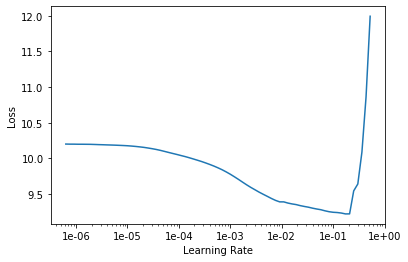

In [22]:
learn.recorder.plot()

In [23]:
learn.model

SequentialRNN(
  (0): TransformerXL(
    (encoder): Embedding(25000, 410)
    (pos_enc): PositionalEncoding()
    (drop_emb): Dropout(p=0.1)
    (layers): ModuleList(
      (0): DecoderLayer(
        (mhra): MultiHeadRelativeAttention(
          (attention): Linear(in_features=410, out_features=1230, bias=False)
          (out): Linear(in_features=410, out_features=410, bias=False)
          (drop_att): Dropout(p=0.1)
          (drop_res): Dropout(p=0.1)
          (ln): LayerNorm(torch.Size([410]), eps=1e-05, elementwise_affine=True)
          (r_attn): Linear(in_features=410, out_features=410, bias=False)
        )
        (ff): SequentialEx(
          (layers): ModuleList(
            (0): Linear(in_features=410, out_features=2100, bias=True)
            (1): ReLU(inplace)
            (2): Dropout(p=0.1)
            (3): Linear(in_features=2100, out_features=410, bias=True)
            (4): Dropout(p=0.1)
            (5): MergeLayer()
            (6): LayerNorm(torch.Size([410]), eps

In [24]:
learn.fit_one_cycle(20, 1e-3, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])

epoch,train_loss,valid_loss,accuracy,time
0,6.615072,6.631398,0.140200,30:52
1,5.816413,5.845291,0.183038,30:55
2,5.319539,5.318941,0.217899,30:52
3,5.022874,5.109102,0.230620,30:47
4,4.968721,5.071134,0.227887,30:54
5,4.858819,4.985186,0.234184,31:05
6,4.982770,4.906001,0.240021,31:06
7,4.840830,4.828884,0.247154,31:10
8,4.787942,4.759645,0.254573,31:12
9,4.768596,4.683124,0.262986,31:12


Better model found at epoch 0 with accuracy value: 0.1402001976966858.
Better model found at epoch 1 with accuracy value: 0.1830381155014038.
Better model found at epoch 2 with accuracy value: 0.21789920330047607.
Better model found at epoch 3 with accuracy value: 0.23062016069889069.
Better model found at epoch 5 with accuracy value: 0.23418447375297546.
Better model found at epoch 6 with accuracy value: 0.2400212436914444.
Better model found at epoch 7 with accuracy value: 0.24715350568294525.
Better model found at epoch 8 with accuracy value: 0.2545730769634247.
Better model found at epoch 9 with accuracy value: 0.26298603415489197.
Better model found at epoch 10 with accuracy value: 0.27054381370544434.
Better model found at epoch 11 with accuracy value: 0.28020015358924866.
Better model found at epoch 12 with accuracy value: 0.29169654846191406.
Better model found at epoch 13 with accuracy value: 0.2999584972858429.
Better model found at epoch 14 with accuracy value: 0.30698603391

In [26]:
TEXT = "ಚುನಾವಣೆ ಬಂತೆಂದರೆ"
N_WORDS = 40
N_SENTENCES = 2

In [27]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

ಚುನಾವಣೆ ಬಂತೆಂದರೆ ▁ಕಾನೂನ ೆಂದೇ ▁ಅರ್ಥ . ಕೆಲವು ▁ಸಲ ▁ಮತದಾರರ ಿಗೆ ▁ಅವರ ▁ಸ್ವಂತ ▁ಮನೆ ಯನ್ನೇ ▁ಆಯ್ಕೆ ▁ಮಾಡಿಕೊಂಡು ▁ಅವರ ▁ವೈಯಕ್ತಿಕ ▁ದಾಖಲೆ ಗಳಿಗೆ ▁ಸಂಬಂಧಿಸಿದಂತೆ ▁ಅಥವಾ ▁ಅವರ ▁ಫ್ಯಾ ನ್ ▁ಗಳ ▁ಸಂಬಂಧ ದಿಂದ ▁ಇದನ್ನು ▁ಚಿತ್ರ ಿಸಲಾಗುತ್ತದೆ . ▁x x b os ▁ . ▁x x b os
ಚುನಾವಣೆ ಬಂತೆಂದರೆ ▁ಒಂದು ▁ಅವಧಿಗೆ ▁ಅಥವಾ ▁ಒಂದು ▁ಪ್ರಮುಖ ▁ಮೌಲ್ಯ ಕ್ಕೆ ▁ನೀಡಿದ ▁ಹೆಚ್ಚು ▁ನಿರ್ದಿಷ್ಟ ▁ಪ್ರಾಮುಖ್ಯತೆ . ▁ಸಾರ್ವಭೌಮ ▁ಭೂಪಟ ವು ▁ಒಂದು ▁ಏಕ ▁ಅಥವಾ ▁ಏಕ ▁ಆಯಾಮ ವಾದ ▁ಒಂದು ▁ಪರ್ಯಾಯ ▁ಪದ ವಾಗಿದೆ . ▁ಇದು ▁ಒಂದು ▁ಏಕ ಲೋಹ ▁ಆಧಾರಿತ ▁ಮತ್ತು ▁ಒಂದು ▁ಏಕ ಲೋಹ ▁ರೂಪದ ▁ಒಂದು ▁ಏಕ - ಲೋಹ


In [28]:
np.exp(4.126805)

61.979581490164826

In [29]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [30]:
# Generating embedding vectors for visualization

In [31]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-kannada/language-model')

In [12]:
# defaults.device = torch.device('cpu')

In [14]:
# learn = load_learner(path / 'KannadaDataset/')

In [32]:
encoder = get_model(learn.model)[0]

In [33]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([25000, 410])

In [34]:
embeddings = encoder.state_dict()['encoder.weight']

In [35]:
embeddings = np.array(embeddings)

In [36]:
embeddings[0].shape

(410,)

In [37]:
df = pd.DataFrame(embeddings)

In [38]:
df.shape

(25000, 410)

In [39]:
df.to_csv('embeddings_transformer.tsv', sep='\t', index=False, header=False)

In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,400,401,402,403,404,405,406,407,408,409
0,-0.266174,0.124870,0.254980,0.076422,0.188704,-0.031145,0.093035,0.253179,-0.196177,0.070887,...,0.363125,0.084763,-0.103276,-0.189418,-0.171104,0.255654,-0.344671,-0.271971,-0.144279,-0.257397
1,0.238252,-0.282687,0.124436,0.035976,0.091160,0.090165,0.246489,0.026561,-0.043298,0.134949,...,0.129805,-0.086011,-0.160074,-0.168352,-0.110117,-0.174372,-0.115746,0.240195,0.226009,-0.159793
2,0.227181,-0.282572,0.125654,0.038089,0.093775,0.092068,0.249090,0.026331,-0.048689,0.137233,...,0.123515,-0.087392,-0.146289,-0.165301,-0.122987,-0.168759,-0.113720,0.238042,0.222497,-0.157990
3,-0.104529,0.227181,0.338077,-0.119556,-0.011237,0.066875,0.005192,0.154692,0.207726,-0.327809,...,0.338531,-0.384790,0.199326,0.071135,0.306256,-0.069827,0.067686,-0.126048,-0.159682,-0.121997
4,0.245394,-0.114821,-0.094656,-0.037495,-0.040027,0.365885,-0.042614,0.175889,0.324687,-0.139640,...,0.286693,-0.151834,0.101049,-0.020544,0.166170,0.048973,0.043354,-0.115249,-0.123124,0.162722


In [41]:
df2 = pd.DataFrame(itos)

In [42]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,.
4,","


In [43]:
df2.shape

(25000, 1)

In [44]:
df2.to_csv('embeddings_transformer_metadata.tsv', sep='\t', index=False, header=False)

In [45]:
encoder.state_dict()['encoder.weight'][1]

tensor([ 0.2383, -0.2827,  0.1244,  0.0360,  0.0912,  0.0902,  0.2465,  0.0266,
        -0.0433,  0.1349,  0.0594, -0.2040, -0.0694, -0.0958, -0.2422,  0.7497,
        -0.2222, -0.1744,  0.1367,  0.2172, -0.0157, -0.1982, -0.0514, -0.2764,
        -0.0066, -0.3184, -0.0118, -0.0459,  0.1500, -0.2728, -0.4488, -0.2391,
        -0.1727, -0.1473, -0.0019,  0.1124, -0.0430,  0.1053,  0.2952,  0.0550,
         0.2364,  0.0728,  0.3142, -0.0295,  0.2594, -0.0781,  0.0229, -0.0894,
         0.0261,  0.3227, -0.1377, -0.3820,  0.1947,  0.0861, -0.0137, -0.1768,
        -0.0227, -0.0366, -0.0450,  0.1080, -0.1580,  0.5235,  0.2110,  0.1552,
         0.3663, -0.3590,  0.1594, -0.0984, -0.1029,  0.3003,  0.4413,  0.0685,
        -0.1884,  0.2368, -0.1354, -0.2102,  0.3959,  0.3352,  0.0309,  0.2807,
         0.1557, -0.3302,  0.0095,  0.1406, -0.1899, -0.1689, -0.1317, -0.0638,
        -0.2040,  0.5297, -0.1660,  0.0796, -0.0847,  0.2343,  0.1887,  0.1286,
        -0.1005, -0.4086,  0.2331, -0.04